In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [103]:
data = pd.read_csv("datanep.csv")
print(data['Volume'].dtype)
print(data.head())
data = data.dropna()

data['Volume'] = data['Volume'].replace({',': ''}, regex=True).astype(float)
data['Volume'] = data['Volume'].astype(float)

object
         Date    Close Percent Change          Volume
0   12/5/2019  1131.92          0.00%  358,839,860.00
1   12/8/2019  1135.37          0.00%  287,527,825.00
2   12/9/2019  1148.89          0.00%  464,220,392.00
3  12/10/2019  1151.36          0.00%  500,328,915.00
4  12/11/2019  1161.47          0.00%  551,377,852.00


# visualizing data in graph


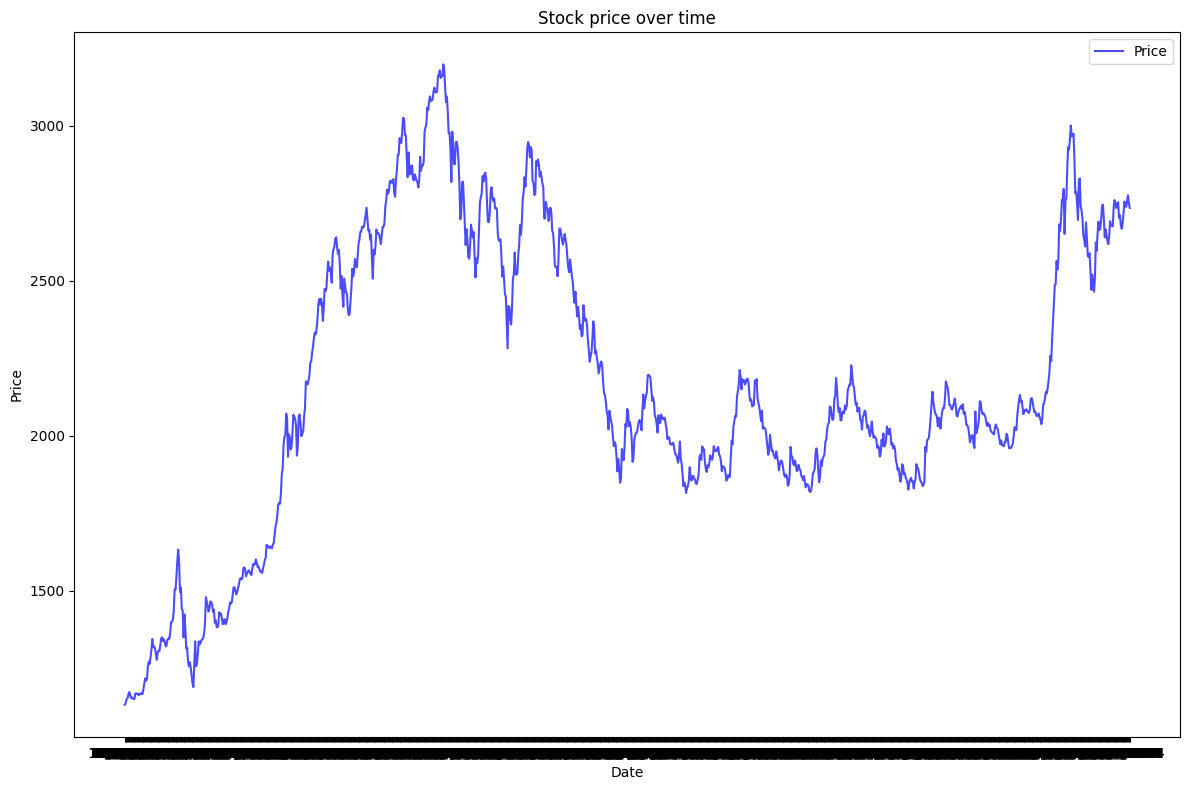

In [104]:

data_slice =data
plt.figure(figsize=(12, 8)) 
plt.plot(data_slice['Date'], data_slice['Close'], label='Price', color='b', linewidth=1.5,alpha=0.7) 

plt.title("Stock price over time")
plt.xlabel("Date")
plt.ylabel("Price")

plt.legend()
plt.tight_layout()
plt.show()

# Calculation for RSI
 ### delta is the change in price relative to previous close and close is the current price closed.
 

In [105]:

delta = data['Close'].diff()
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)
avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()
rs = avg_gain / avg_loss
data['RSI'] = 100 - (100 / (1 + rs))

data['delta']= data['Close'].diff()
print(data[1110:])





            Date    Close Percent Change        Volume        RSI  delta
1110  11/10/2024  2738.06          2.33%  9.771124e+09  55.078290  62.55
1111  11/11/2024  2760.21          0.80%  1.131521e+10  52.427103  22.15
1112  11/12/2024  2748.96         -0.40%  7.859741e+09  50.492099 -11.25
1113  11/13/2024  2734.83         -0.51%  7.911976e+09  55.552548 -14.13
1114  11/14/2024  2748.78          0.51%  1.032033e+10  68.871784  13.95
1115  11/17/2024  2753.76          0.18%  1.172676e+10  66.438638   4.98
1116  11/19/2024  2702.65         -1.85%  1.046832e+10  59.600939 -51.11
1117  11/20/2024  2711.75          0.33%  7.092880e+09  64.635876   9.10
1118  11/21/2024  2680.44         -1.15%  8.257644e+09  60.041135 -31.31
1119  11/24/2024  2667.40         -0.48%  7.728861e+09  53.712938 -13.04
1120  11/25/2024  2683.24          0.59%  6.345810e+09  48.343674  15.84
1121  11/26/2024  2716.66          1.24%  7.449899e+09  56.850565  33.42
1122  11/27/2024  2755.47          1.42%  9.312935e

# Plotting the rsi and price in the same plot

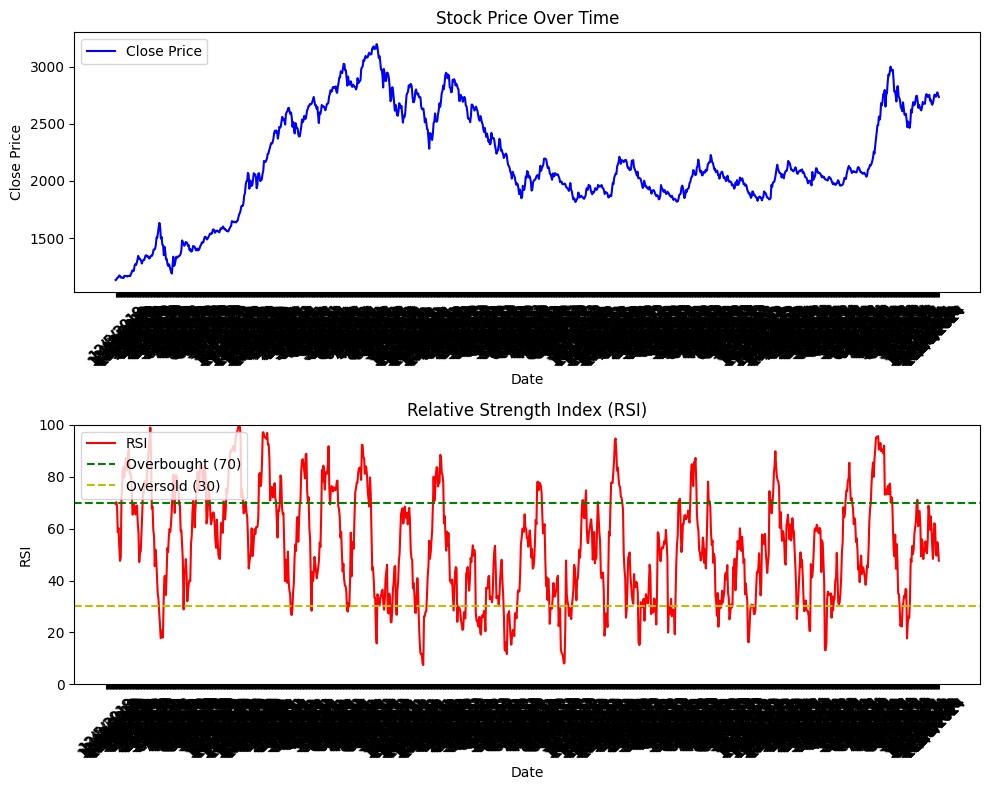

In [106]:
# Creating the plot
fig, ax = plt.subplots(2, 1, figsize=(10, 8))

# Plot the Close price on the first subplot
ax[0].plot(data['Date'], data['Close'], label='Close Price', color='b')
ax[0].set_title('Stock Price Over Time')
ax[0].set_xlabel('Date')
ax[0].set_ylabel('Close Price')
ax[0].legend(loc='upper left')

ax[0].tick_params(axis='x', rotation=45)

# Plot the RSI on the second subplot
ax[1].plot(data['Date'], data['RSI'], label='RSI', color='r')
ax[1].axhline(70, color='g', linestyle='--', label='Overbought (70)')
ax[1].axhline(30, color='y', linestyle='--', label='Oversold (30)')
ax[1].set_title('Relative Strength Index (RSI)')
ax[1].set_xlabel('Date')
ax[1].set_ylabel('RSI')
ax[1].legend(loc='upper left')
ax[1].set_ylim([0, 100])  # Set RSI range from 0 to 100

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Layout adjustment to avoid overlapping
plt.tight_layout()

# Show the plot
plt.show()

In [107]:
print(data['Volume'].dtype)
print(data.head())

float64
         Date    Close Percent Change       Volume  RSI  delta
0   12/5/2019  1131.92          0.00%  358839860.0  NaN    NaN
1   12/8/2019  1135.37          0.00%  287527825.0  NaN   3.45
2   12/9/2019  1148.89          0.00%  464220392.0  NaN  13.52
3  12/10/2019  1151.36          0.00%  500328915.0  NaN   2.47
4  12/11/2019  1161.47          0.00%  551377852.0  NaN  10.11


In [108]:

data['Next Close'] = data['Close'].shift(-1)
data.tail


data = data.dropna(subset=['RSI', 'Close', 'Volume'])

data = data.dropna(subset=['Next Close'])

X = data[['RSI', 'Close', 'Volume']]
y = data['Next Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()



model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

Mean Absolute Error: 24.92867477460756


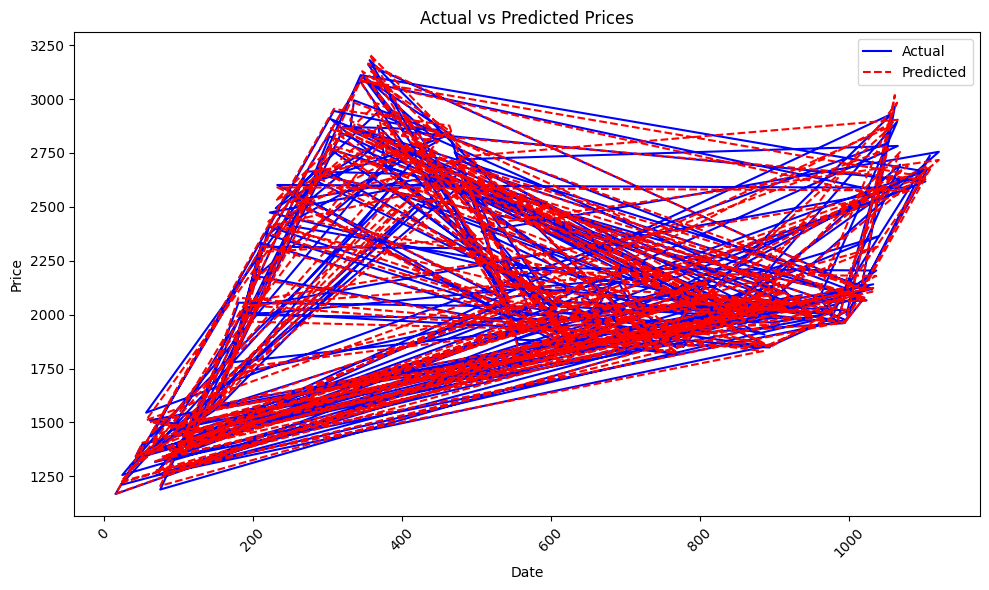

In [109]:
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Actual', color='blue')
plt.plot(y_test.index, y_pred, label='Predicted', color='red', linestyle='--')
plt.title('Actual vs Predicted Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

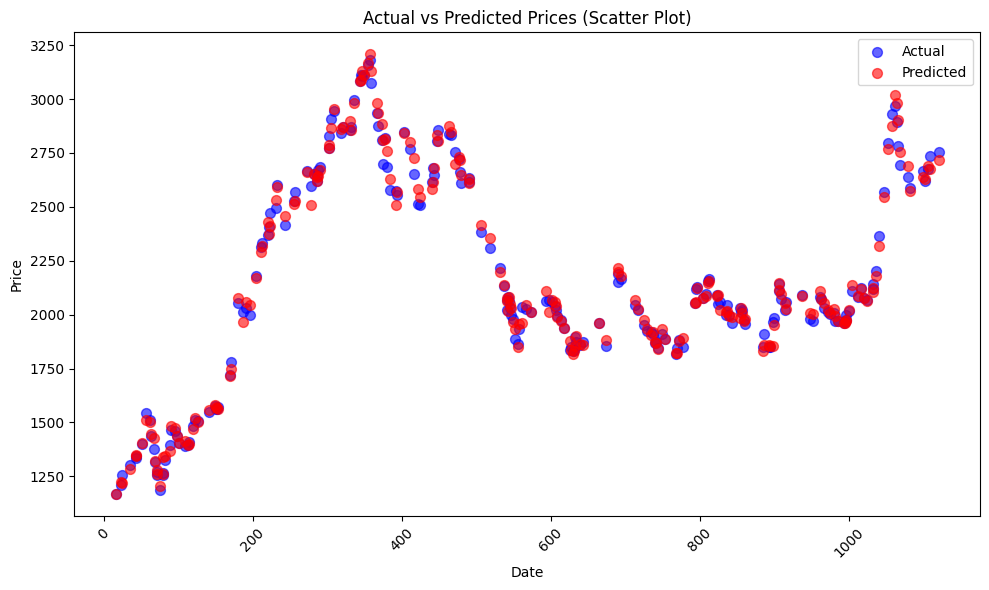

In [110]:


# Assuming y_test and y_pred are defined and aligned
plt.figure(figsize=(10, 6))

# Scatter plot of actual vs predicted
plt.scatter(y_test.index, y_test, label='Actual', color='blue', alpha=0.6, s=50)
plt.scatter(y_test.index, y_pred, label='Predicted', color='red', alpha=0.6, s=50)

# Title and labels
plt.title('Actual vs Predicted Prices (Scatter Plot)')
plt.xlabel('Date')
plt.ylabel('Price')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Show legend and adjust layout
plt.legend()
plt.tight_layout()

# Display the plot
plt.show()




In [122]:

today_data = pd.DataFrame({
    'RSI': [55.35],
    'Close': 2750.87,
    
    'Volume': [9132468906.77]
})

# Use the trained model to predict tomorrow's price
predicted_price = model.predict(today_data)
print(f'Tomorrow\'s predicted price: {predicted_price[0]}')

Tomorrow's predicted price: 2752.628682757553


# MACD calculation
### the ema lines are taken as standard 12 day and 26 days



In [ ]:
data

,Date,Close,Percent Change,Volume,RSI,delta,Next Close
13,12/24/2019,1166.21,0.00%,7.216430e+08,69.583095,-2.37,1168.03
14,12/25/2019,1168.03,0.00%,5.383408e+08,70.202529,1.82,1167.41
15,12/26/2019,1167.41,0.00%,5.886779e+08,68.511671,-0.62,1162.43
16,12/29/2019,1162.43,0.00%,4.224539e+08,58.679487,-4.98,1167.95
17,12/30/2019,1167.95,0.00%,6.223635e+08,60.234423,5.52,1166.03
...,...,...,...,...,...,...,...
1122,11/27/2024,2755.47,1.42%,9.312935e+09,62.065342,38.81,2748.05
1123,11/28/2024,2748.05,-0.30%,8.545525e+09,61.022306,-7.42,2738.06
1124,12/1/2024,2738.06,-0.36%,8.832226e+09,50.000000,-9.99,2758.04
1125,12/2/2024,2758.04,0.72%,1.054175e+10,49.604491,19.98,2775.85


In [ ]:

data['ema12']= data['Close'].ewm(span= 12, adjust= False).mean()

data['ema26'] = data['Close'].ewm(span = 26, adjust = False).mean()

data['macd line'] = data['ema12'] - data['ema26']

data['signal line'] = data['macd line'].ewm(span = 9, adjust = False).mean()

data['macd histogram'] = data['macd line'] - data['signal line']



data



,Date,Close,Percent Change,Volume,RSI,delta,ema12,ema26,macd line,signal line,macd histogram
0,12/5/2019,1131.92,0.00%,"358,839,860.00",NaN,NaN,1131.920000,1131.920000,0.000000,0.000000,0.000000
1,12/8/2019,1135.37,0.00%,"287,527,825.00",NaN,3.45,1132.450769,1132.175556,0.275214,0.055043,0.220171
2,12/9/2019,1148.89,0.00%,"464,220,392.00",NaN,13.52,1134.979882,1133.413663,1.566219,0.357278,1.208941
3,12/10/2019,1151.36,0.00%,"500,328,915.00",NaN,2.47,1137.499900,1134.743021,2.756879,0.837198,1.919681
4,12/11/2019,1161.47,0.00%,"551,377,852.00",NaN,10.11,1141.187608,1136.722797,4.464810,1.562721,2.902090
...,...,...,...,...,...,...,...,...,...,...,...
1124,12/1/2024,2738.06,-0.36%,"8,832,225,892.82",50.000000,-9.99,2719.656075,2702.860748,16.795328,15.701709,1.093618
1125,12/2/2024,2758.04,0.72%,"10,541,746,564.07",49.604491,19.98,2725.561295,2706.948100,18.613195,16.284006,2.329188
1126,12/3/2024,2775.85,0.64%,"8,521,219,299.67",54.786571,17.81,2733.298019,2712.051944,21.246074,17.276420,3.969654
1127,12/4/2024,2750.87,-0.89%,"9,132,468,906.77",52.749023,-24.98,2736.001400,2714.927356,21.074044,18.035945,3.038100


ValueError: All arrays must be of the same length